In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data=pd.read_csv('zomato.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [6]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# DATA CLEANING

In [7]:
#Removing unnecessary data such as url, address and phone columns from DataFrame

In [8]:
del data['url']
del data['address']
del data['phone']

In [9]:
#Replacing restaurants with their ratings given as New to NAN and dropping them finally 
data['rate'] = data['rate'].replace('NEW',np.NaN)
data['rate'] = data['rate'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [10]:
data['rate'] = data.loc[:,'rate'].replace('[ ]','',regex = True)
data['rate'] = data['rate'].astype(str)
data['rate'] = data['rate'].apply(lambda r: r.replace('/5',''))
data['rate'] = data['rate'].apply(lambda r: float(r))

In [11]:
#Conversion of Cost from String to Integer
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].str.replace(',','')
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(int)

In [12]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Analysis of Restaurants based on their Online Delivery

In [13]:
print("No. of restaurants with online delivery:")
(data.online_order == 'Yes').sum()

No. of restaurants with online delivery:


16387

In [14]:
print("No. of restaurants which does not deliver online:")
(data.online_order == 'No').sum()

No. of restaurants which does not deliver online:


6872

In [15]:
data.name.count()

23259

Text(0.5, 1.0, 'Restaurants delivering online or Not')

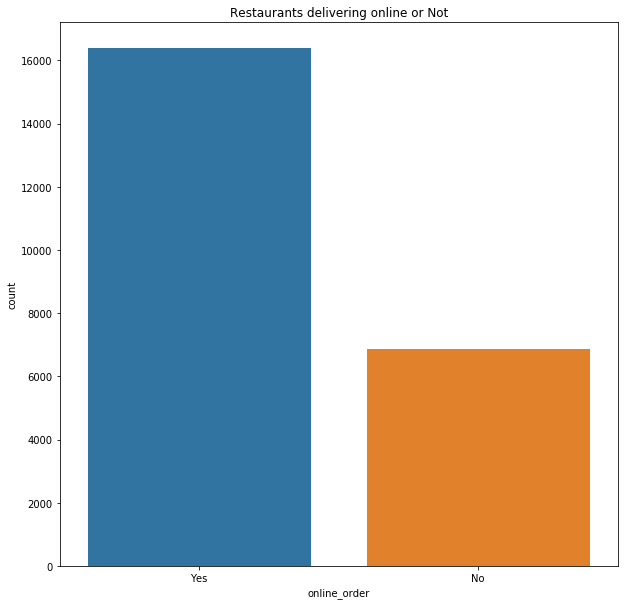

In [82]:
sns.countplot(x=data['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

Text(0.5, 1.0, 'Type of Restaurants delivering online or Not')

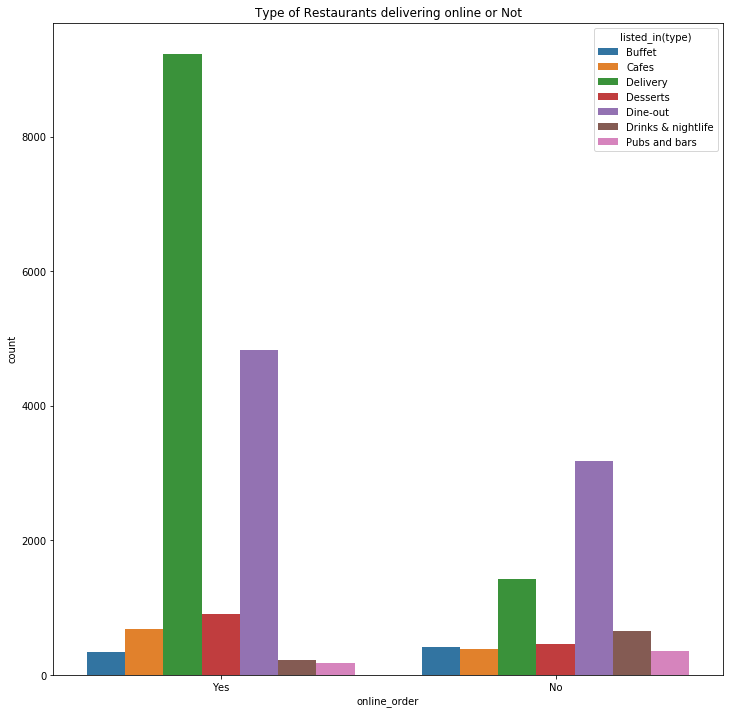

In [17]:
sns.countplot(x=data['online_order'], hue = data['listed_in(type)'])
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Type of Restaurants delivering online or Not')

# Analysis of Restaurants based on their Table booking facility

In [18]:
print("No. of restaurants with table booking facility:")
(data.book_table == 'Yes').sum()

No. of restaurants with table booking facility:


6061

In [19]:
print("No. of restaurants with table booking facility:")
(data.book_table == 'No').sum()

No. of restaurants with table booking facility:


17198

Text(0.5, 1.0, 'Type Of Restaurants providing Table booking facility:')

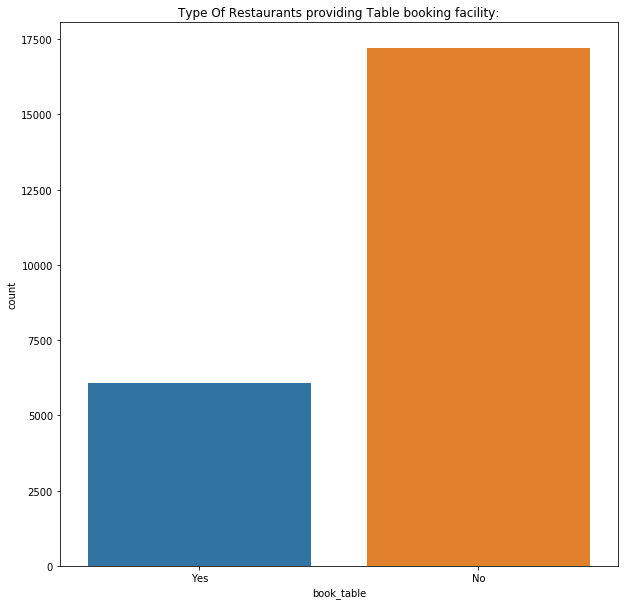

In [83]:
sns.countplot(x=data['book_table'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type Of Restaurants providing Table booking facility:')

Text(0.5, 1.0, 'Type Of Restaurants providing Table booking facility:')

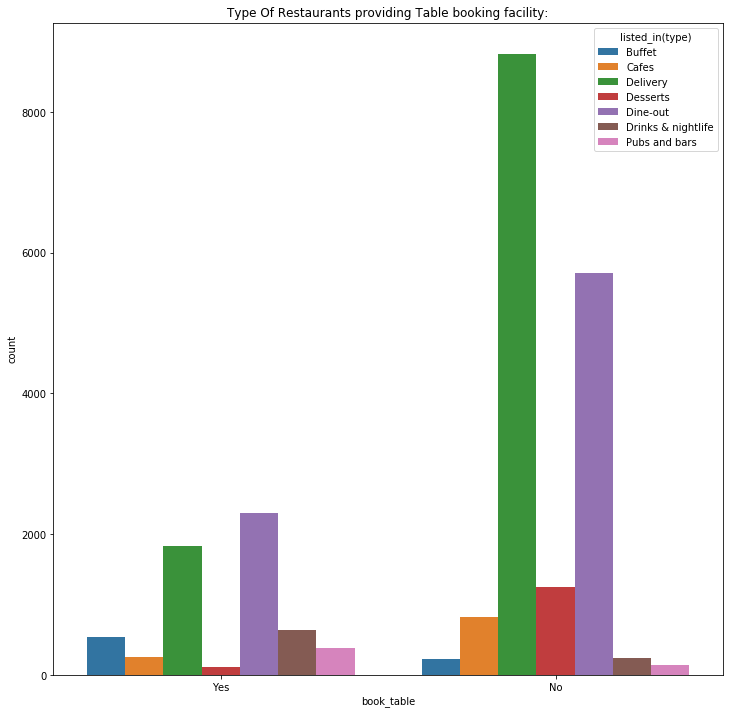

In [20]:
sns.countplot(x=data['book_table'],hue = data['listed_in(type)'])
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Type Of Restaurants providing Table booking facility:')

# Analysis of Restaurants based on their Ratings

In [21]:
data.rate.unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [22]:
((data.rate>=1.5) & (data.rate<2)).sum()

5

In [23]:
((data.rate>=2.5) & (data.rate<3)).sum()

1019

In [24]:
((data.rate>=2) & (data.rate<2.5)).sum()

160

In [25]:
((data.rate>=3.0) & (data.rate<3.5)).sum()

1418

In [26]:
((data.rate>=3.5) & (data.rate<4)).sum()

8740

In [27]:
((data.rate>=4) & (data.rate<4.5)).sum()

10681

In [28]:
((data.rate>=4.5) & (data.rate<5)).sum()

1236

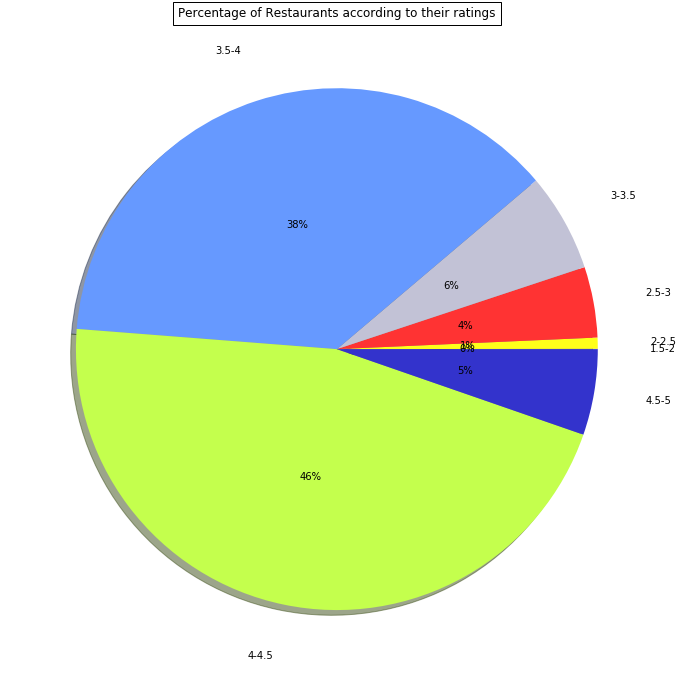

In [29]:
slices=[((data.rate>=1.5) & (data.rate<2)).sum(),
        ((data.rate>=2) & (data.rate<2.5)).sum(),
        ((data.rate>=2.5) & (data.rate<3)).sum(),
        ((data.rate>=3.0) & (data.rate<3.5)).sum(),
        ((data.rate>=3.5) & (data.rate<4)).sum(),
        ((data.rate>=4) & (data.rate<4.5)).sum(),
        ((data.rate>=4.5) & (data.rate<5)).sum()
       ]
labels=['1.5-2','2-2.5','2.5-3','3-3.5','3.5-4','4-4.5','4.5-5']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(12,12)
plt.show()

# Analysis of Restaurants based on their Location

In [30]:
data.location.unique()

array(['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
       'Rajarajeshwari Nagar', 'Mysore Road', 'Uttarahalli',
       'South Bangalore', 'Vijay Nagar', 'Bannerghatta Road', 'JP Nagar',
       'BTM', 'Wilson Garden', 'Koramangala 5th Block', 'Shanti Nagar',
       'Richmond Road', 'City Market', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'HSR', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'East Bangalore', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road', 'Domlur',
       'Koramangala 8th Block', 'Frazer Town', 'Ejipura', 'Vasanth Nagar',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Commercial Street',
       'Koramangala 6th Block', 'Majestic', 'Langford Town',
       'Koramangala 7th Block', 'Brookefield', 'Whitefield',
       'ITPL Main Road, Whitefield', 'Varthur Main Road, Whi

In [31]:
locationCount=data['location'].value_counts().sort_values(ascending=True)
locationCount

KR Puram                            1
Magadi Road                         2
Kanakapura Road                     2
Rajarajeshwari Nagar                2
West Bangalore                      2
Yelahanka                           2
Jalahalli                           3
North Bangalore                     3
Central Bangalore                   3
Uttarahalli                         4
Mysore Road                         4
Rammurthy Nagar                     6
East Bangalore                      8
CV Raman Nagar                     14
City Market                        14
Vijay Nagar                        15
Old Madras Road                    16
Sanjay Nagar                       17
Sankey Road                        17
Koramangala                        17
South Bangalore                    19
Sahakara Nagar                     20
RT Nagar                           22
Langford Town                      22
Hosur Road                         24
Yeshwantpur                        24
Varthur Main

In [32]:
#lets check max count
count_max=max(locationCount)
for x,y in locationCount.items():
    if(y==count_max):
        print(x)

Koramangala 5th Block


In [33]:
#lets check min count
min_count=min(locationCount)
for x,y in locationCount.items():
    if(y==min_count):
        print(x)

KR Puram


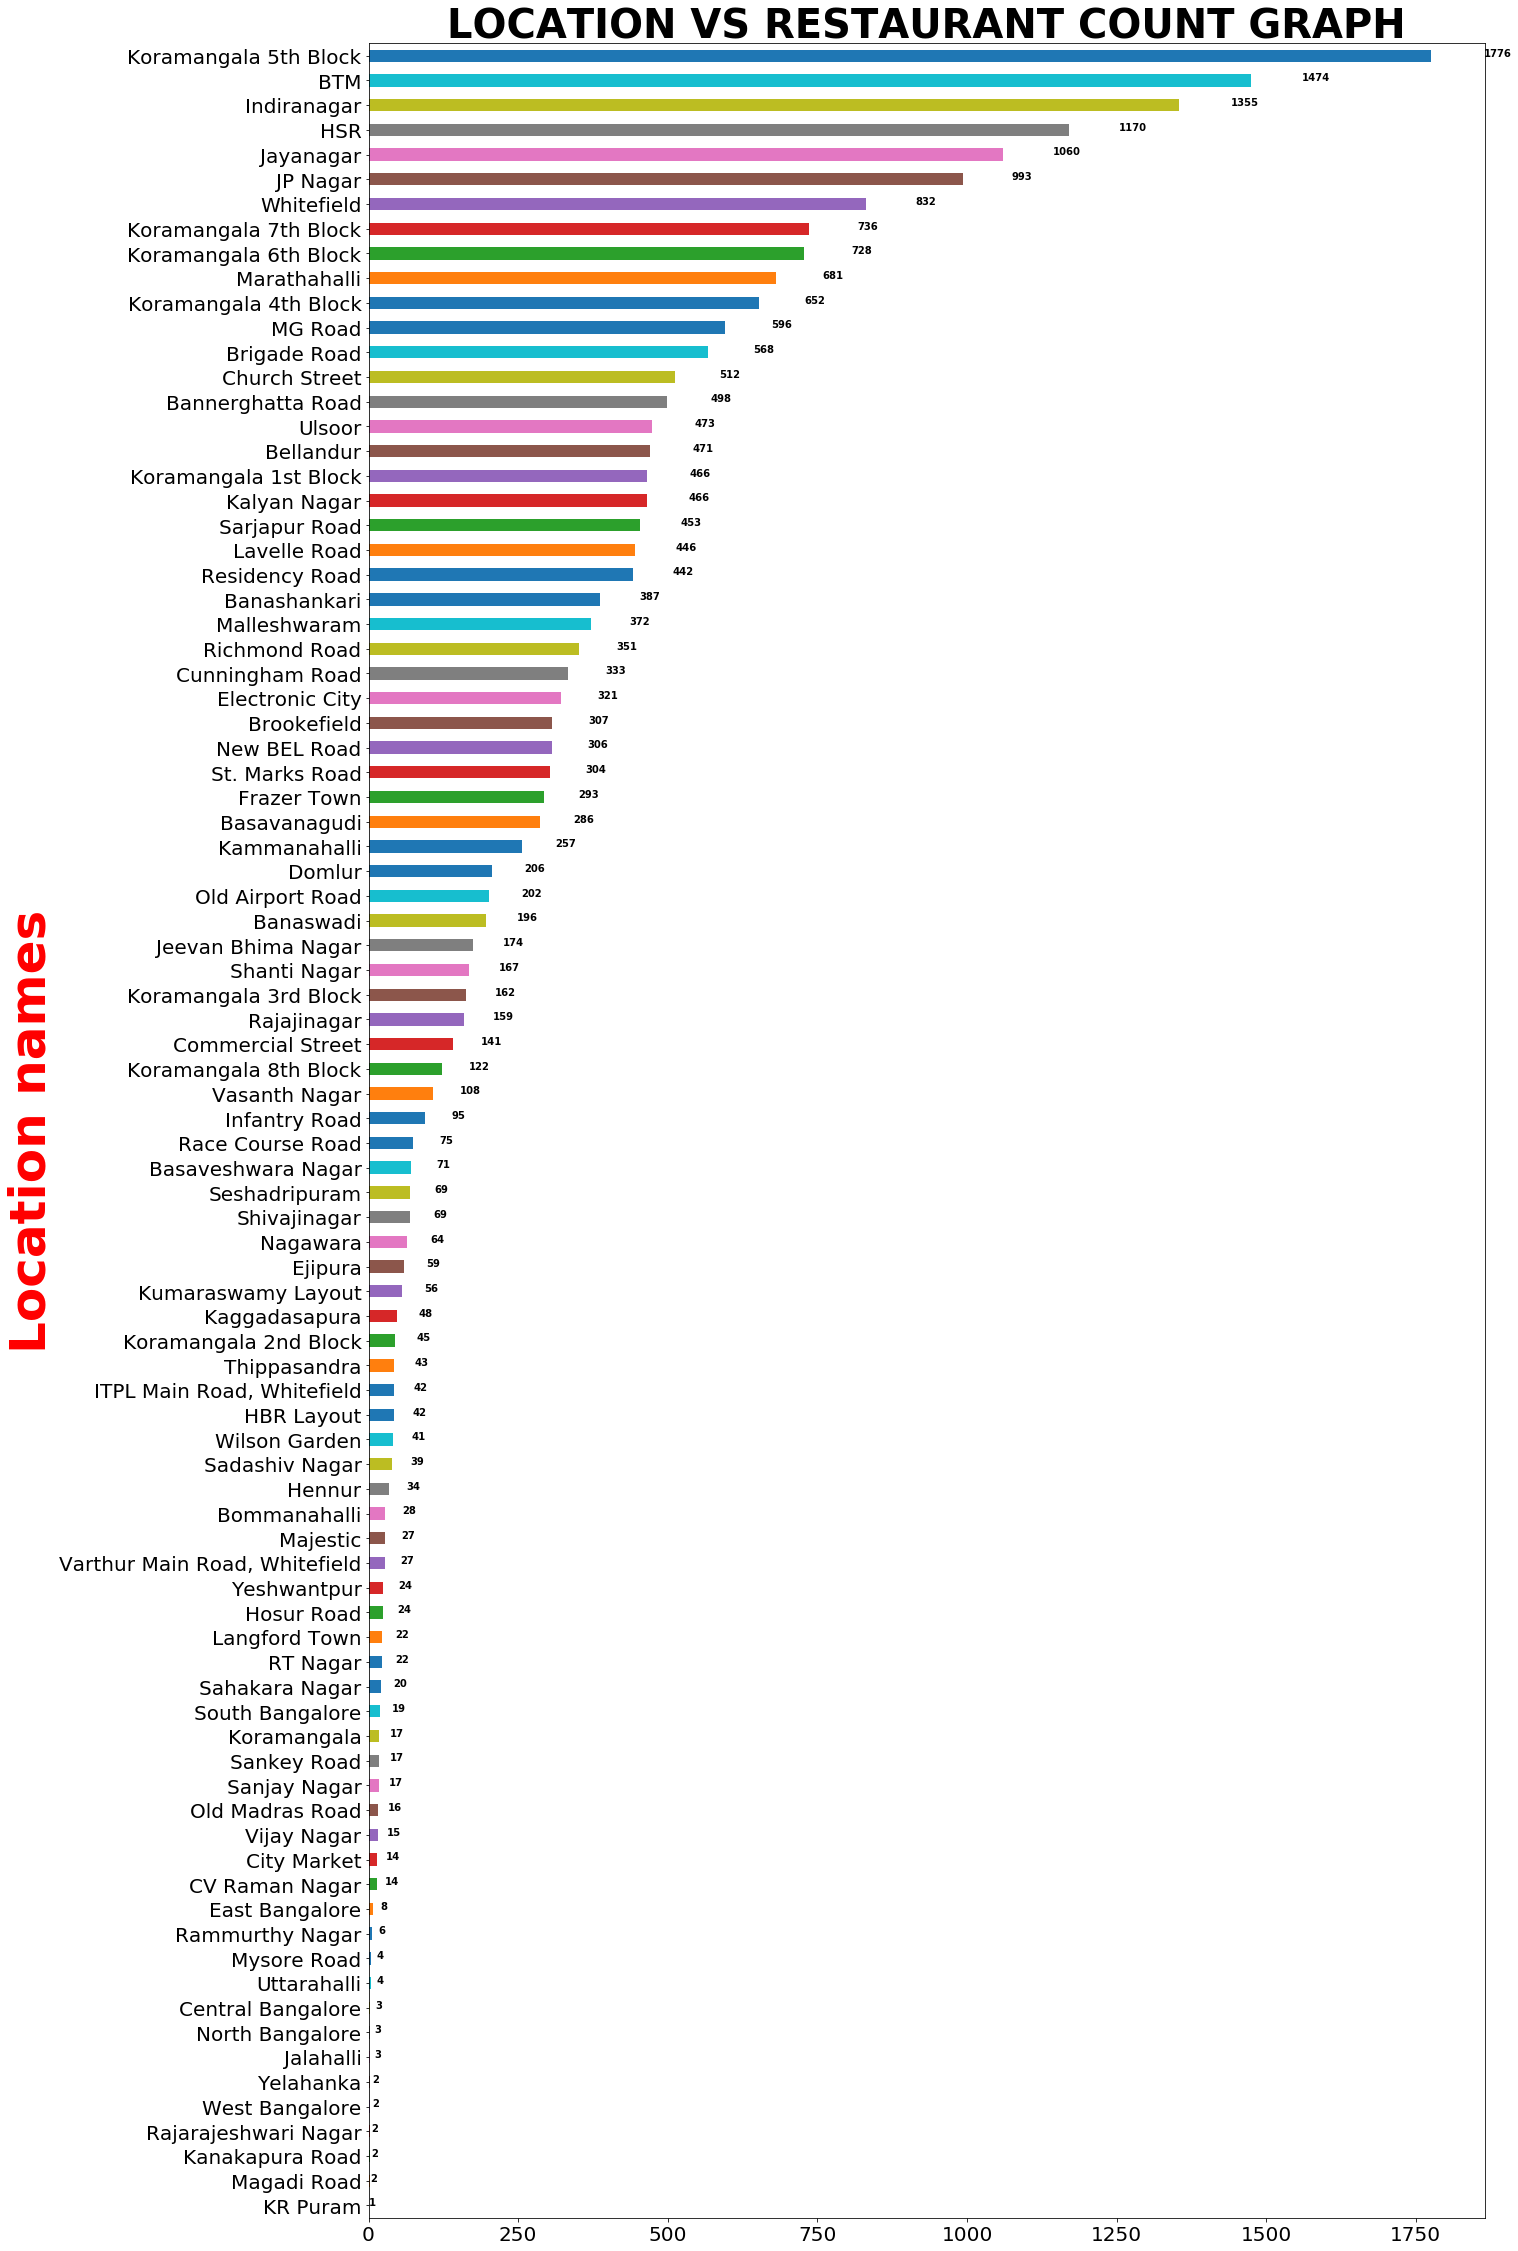

In [34]:
fig=plt.figure(figsize=(20,40))
locationCount.plot(kind="barh",fontsize=20)
plt.ylabel("Location names",fontsize=50,color="red",fontweight='bold')
plt.title("LOCATION VS RESTAURANT COUNT GRAPH",fontsize=40,color="BLACK",fontweight='bold')
for v in range(len(locationCount)):
    #plt.text(x axis location ,y axis location ,text value ,other parameters......)
    plt.text(v+locationCount[v],v,locationCount[v],fontsize=10,color="BLACK",fontweight='bold')

# Analysis of Restaurants based on their Dining Type

In [35]:
data['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [36]:
restaurantTypeCount=data['listed_in(type)'].value_counts().sort_values(ascending=True)
restaurantTypeCount

Pubs and bars           523
Buffet                  754
Drinks & nightlife      879
Cafes                  1066
Desserts               1364
Dine-out               8009
Delivery              10664
Name: listed_in(type), dtype: int64

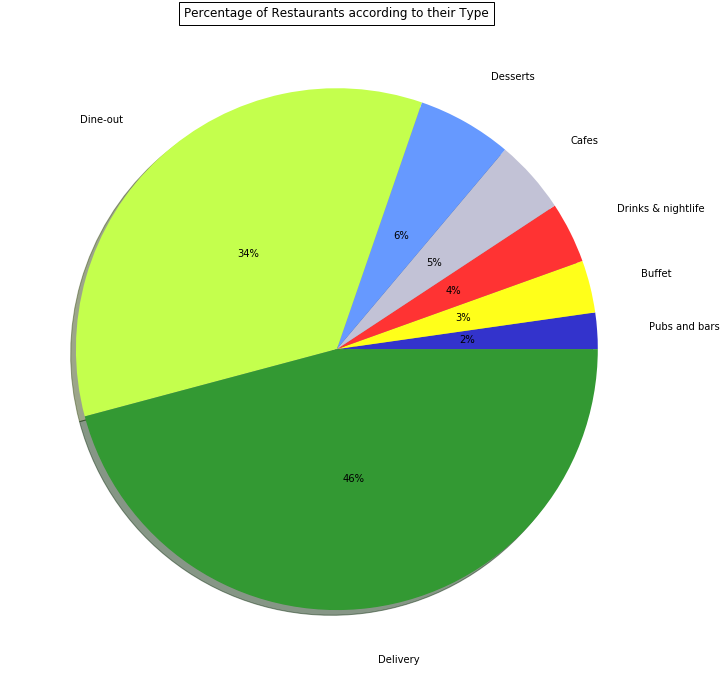

In [37]:
slices=[restaurantTypeCount[0],
        restaurantTypeCount[1],
        restaurantTypeCount[2],
        restaurantTypeCount[3],
        restaurantTypeCount[4],
        restaurantTypeCount[5],
        restaurantTypeCount[6]]
labels=['Pubs and bars','Buffet','Drinks & nightlife','Cafes','Desserts','Dine-out','Delivery ']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their Type", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(12,12)
plt.show()

# Analysis of Restaurants based on their Subcity Type

In [38]:
CityCount=data['listed_in(city)'].value_counts().sort_values(ascending=True)
CityCount

New BEL Road              284
Electronic City           320
Banashankari              373
Rajajinagar               378
Malleshwaram              498
Sarjapur Road             503
Bellandur                 507
Kalyan Nagar              518
Kammanahalli              532
Bannerghatta Road         543
Frazer Town               545
Brookefield               600
Basavanagudi              603
Marathahalli              620
Whitefield                632
HSR                       743
Old Airport Road          757
JP Nagar                  817
Residency Road            843
Lavelle Road              896
Brigade Road              969
Church Street             983
MG Road                  1009
Indiranagar              1015
Jayanagar                1058
Koramangala 6th Block    1253
Koramangala 5th Block    1311
Koramangala 4th Block    1348
Koramangala 7th Block    1381
BTM                      1420
Name: listed_in(city), dtype: int64

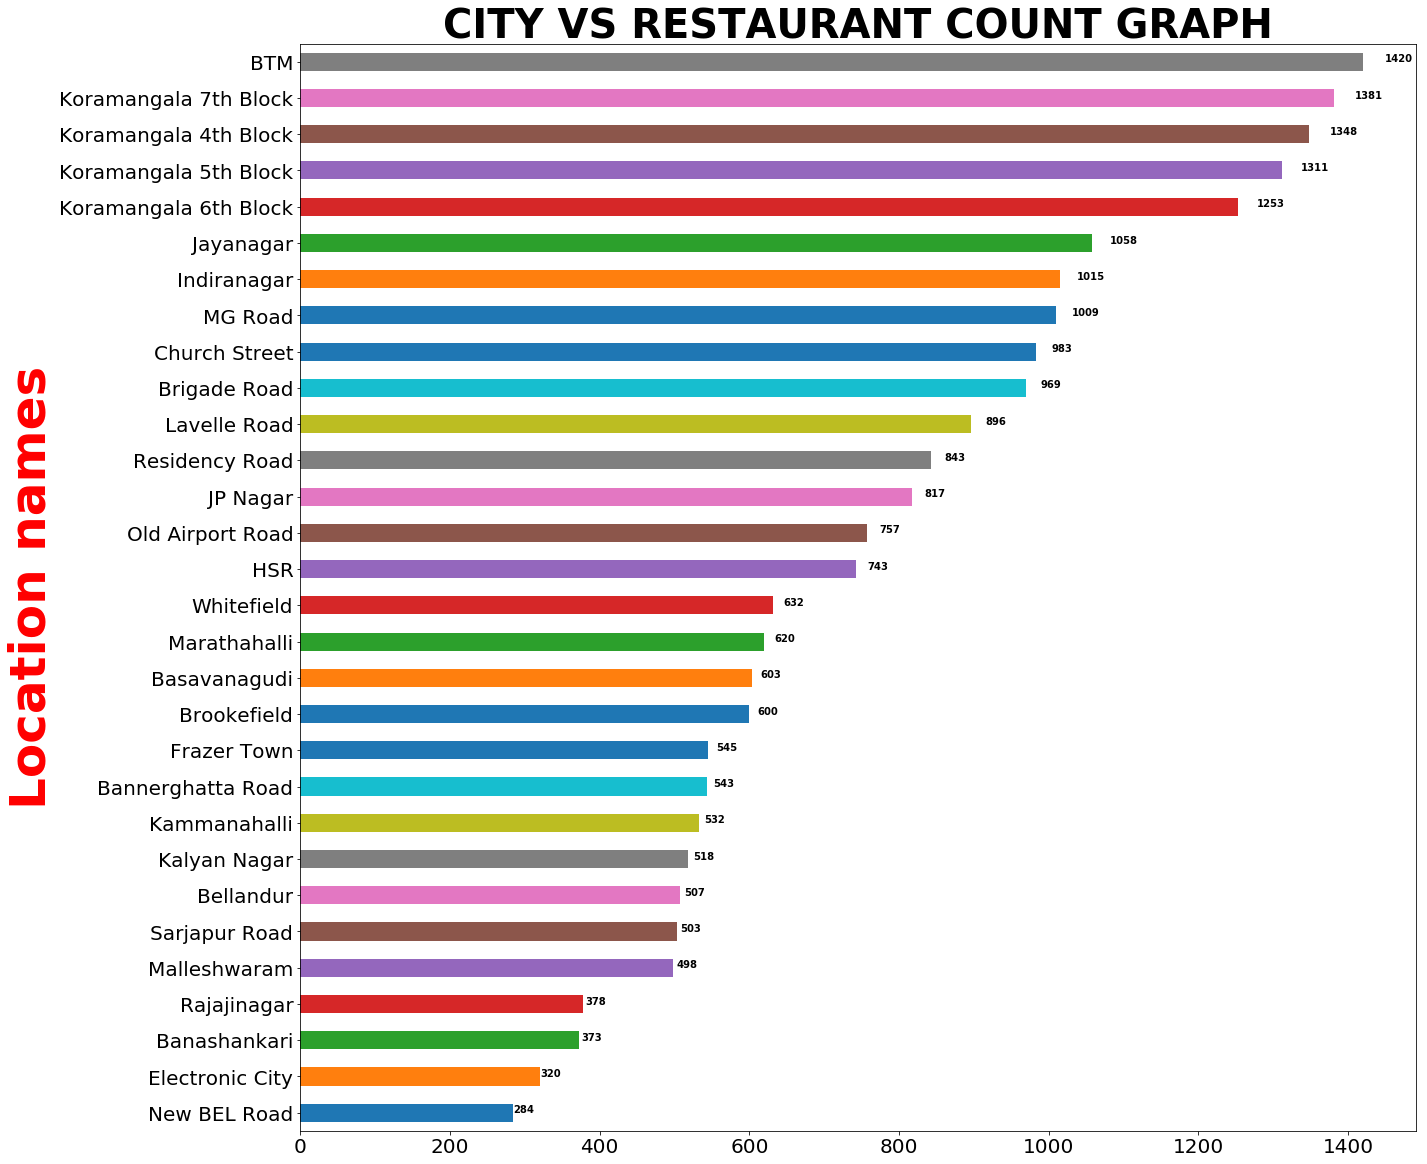

In [39]:
fig=plt.figure(figsize=(20,20))
CityCount.plot(kind="barh",fontsize=20)
plt.ylabel("Location names",fontsize=50,color="red",fontweight='bold')
plt.title("CITY VS RESTAURANT COUNT GRAPH",fontsize=40,color="BLACK",fontweight='bold')
for v in range(len(CityCount)):
    #plt.text(x axis location ,y axis location ,text value ,other parameters......)
    plt.text(v+CityCount[v],v,CityCount[v],fontsize=10,color="BLACK",fontweight='bold')

Text(0.5, 1.0, 'COST FOR 2 PEOPLE VS RESTAURANT  GRAPH')

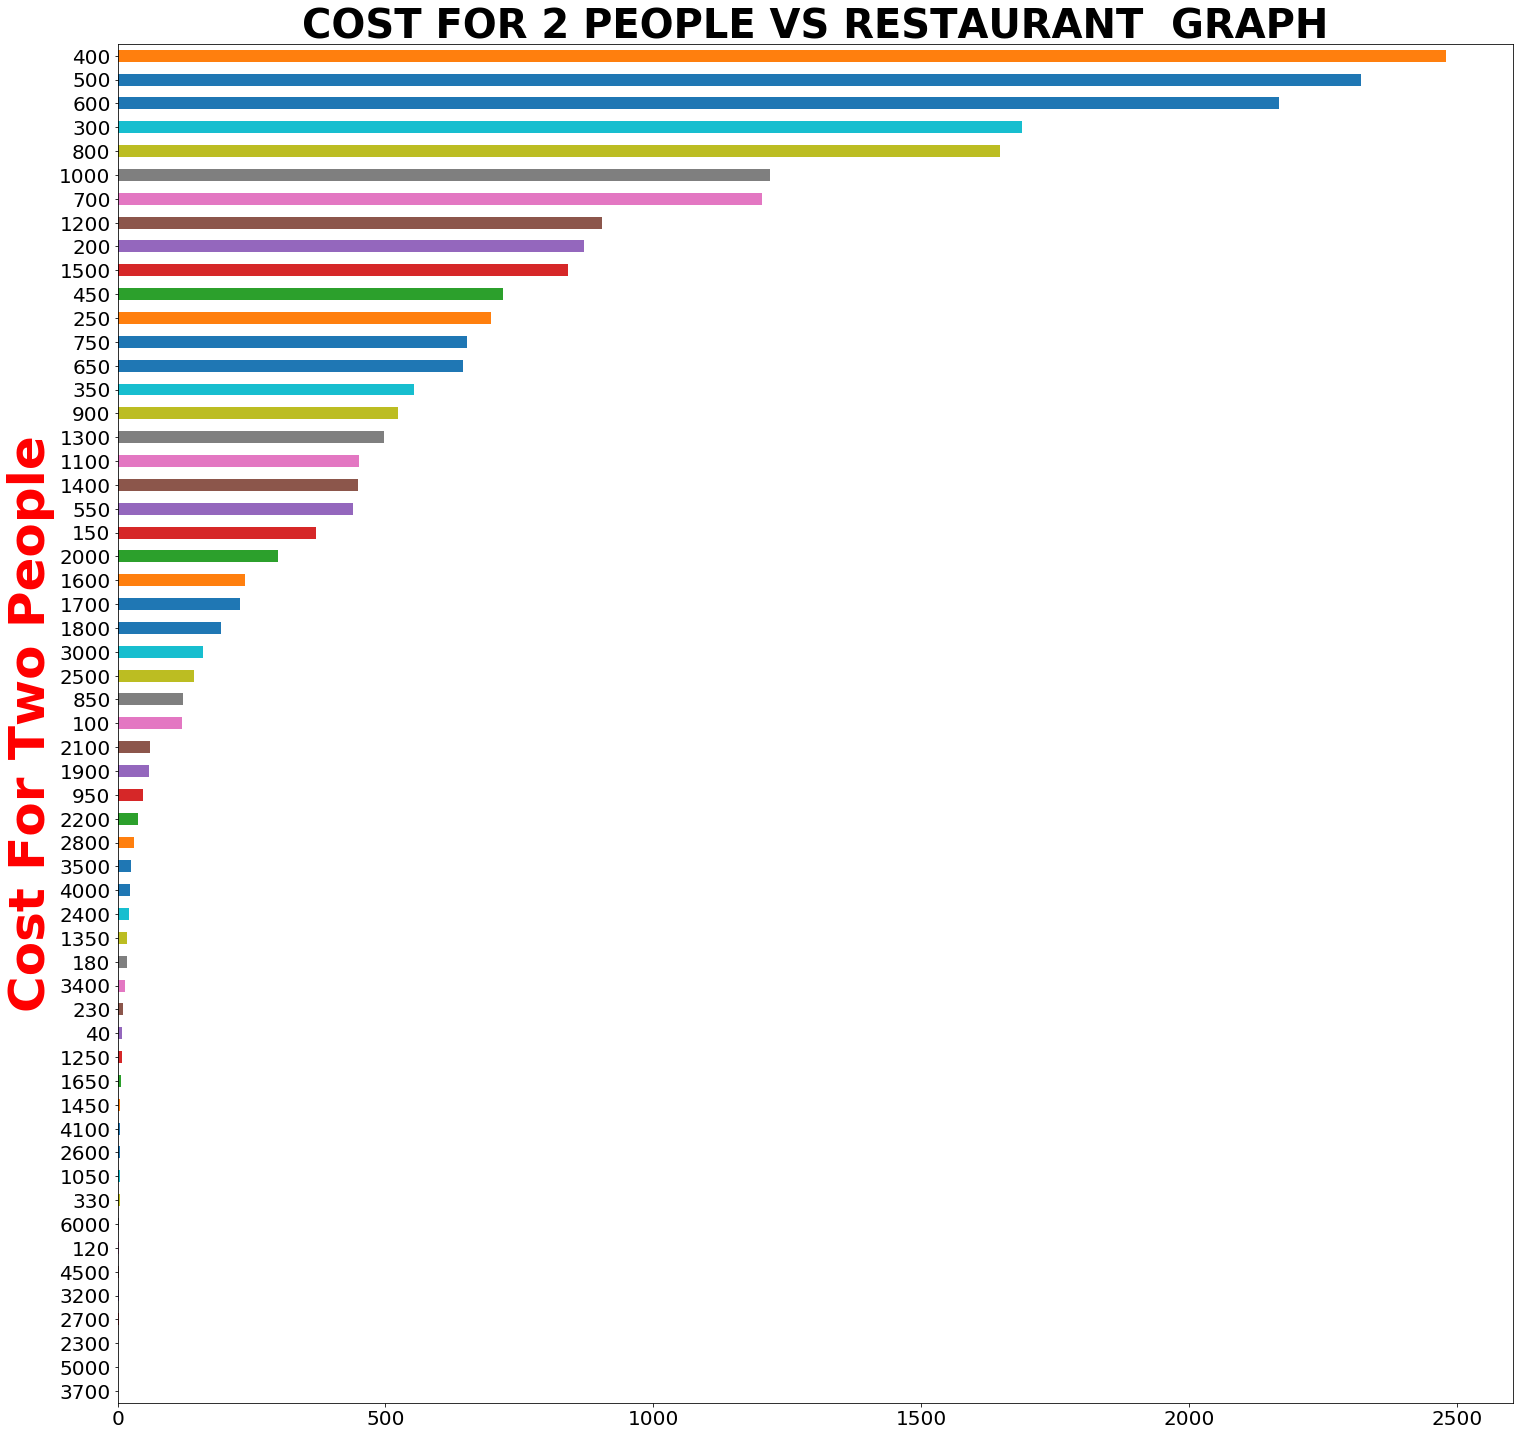

In [40]:
CostCount=data['approx_cost(for two people)'].value_counts().sort_values(ascending=True)
fig=plt.figure(figsize=(25,25))
CostCount.plot(kind="barh",fontsize=20)
plt.ylabel("Cost For Two People",fontsize=50,color="red",fontweight='bold')
plt.title("COST FOR 2 PEOPLE VS RESTAURANT  GRAPH",fontsize=40,color="BLACK",fontweight='bold')


In [41]:
data.votes.describe()

count    23259.000000
mean       605.388710
std       1113.483548
min          0.000000
25%        104.000000
50%        225.000000
75%        597.000000
max      16832.000000
Name: votes, dtype: float64

In [42]:
data[((data.votes>=300)==True) & ((data.rate>=4)==True)].describe()

,rate,votes,approx_cost(for two people)
count,7504.000000,7504.000000,7504.00000
mean,4.243790,1450.868204,1037.55597
std,0.191193,1627.246752,568.63117
min,4.000000,300.000000,100.00000
25%,4.100000,512.000000,600.00000
50%,4.200000,876.500000,1000.00000
75%,4.400000,1774.000000,1400.00000
max,4.900000,16832.000000,5000.00000


# Analysis of Restaurants based on their FoodType

In [43]:
data['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Andhra, Hyderabadi, Biryani',
       'Andhra, North Indian, South Indian', 'Thai, Chinese, Momos'],
      dtype=object)

### Get All the North Indian Food Serving Restaurants

In [44]:

NorthIndianFoodRestaurants = data[data['cuisines'].str.contains('North Indian', case=False, regex=True,na=False)]
NorthIndianFoodRestaurants

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
20,The Vintage Cafe,Yes,No,3.0,62,Banashankari,Cafe,"Burgers, Caramel Milkshake, Iced Coffee, Iced Tea","Cafe, French, North Indian",400,"[('Rated 2.0', ""RATED\n This is a tiny cafÃ\...",[],Cafes,Banashankari
29,Srinathji's Cafe,No,No,3.8,148,Basavanagudi,"Casual Dining, Cafe","Paratha, Sandwich, Chilli Idli, Noodles, Sandw...","North Indian, Cafe, Chinese, Fast Food",550,"[('Rated 5.0', 'RATED\n No words for the pane...",[],Cafes,Banashankari
31,Foodiction,Yes,No,2.8,506,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari
34,Faasos,Yes,No,4.2,415,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari
38,Empire Restaurant,Yes,No,4.4,4884,Jayanagar,Casual Dining,"Chicken Tikka Masala, Mutton Keema Dosa, Mutto...","North Indian, Mughlai, South Indian, Chinese",750,"[('Rated 3.0', 'RATED\n Grill and tandoori is...",[],Delivery,Banashankari


### Get All the Chinese Food Serving Restaurants

In [45]:

ChineseFoodRestaurants = data[data['cuisines'].str.contains('Chinese|Momos', case=False, regex=True,na=False)]
ChineseFoodRestaurants

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari
12,The Coffee Shack,Yes,Yes,4.2,164,Banashankari,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,"[('Rated 4.0', ""RATED\n Food - 4/5\nAmbience ...",[],Cafes,Banashankari
16,Catch-up-ino,Yes,No,3.9,133,Banashankari,Cafe,"Momos, Mushroom Bruschettas, Jalapeno Cheeseba...","Cafe, Fast Food, Continental, Chinese, Momos",800,"[('Rated 1.0', ""RATED\n This place is right o...",[],Cafes,Banashankari
17,Kirthi's Biryani,Yes,No,3.8,144,Banashankari,Cafe,"Pasta, Gelato, Garlic Bread, Mojito, Nachos, P...","Chinese, Cafe, Italian",700,"[('Rated 3.0', ""RATED\n New place.. though it...",[],Cafes,Banashankari
29,Srinathji's Cafe,No,No,3.8,148,Basavanagudi,"Casual Dining, Cafe","Paratha, Sandwich, Chilli Idli, Noodles, Sandw...","North Indian, Cafe, Chinese, Fast Food",550,"[('Rated 5.0', 'RATED\n No words for the pane...",[],Cafes,Banashankari
31,Foodiction,Yes,No,2.8,506,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari
37,Szechuan Dragon,Yes,No,4.2,1647,Banashankari,Casual Dining,"Noodles, Momos, Veg Manchow Soup, Kung Pao Chi...","Chinese, Thai, Momos",600,"[('Rated 4.0', 'RATED\n Located near BMS coll...",[],Delivery,Banashankari
38,Empire Restaurant,Yes,No,4.4,4884,Jayanagar,Casual Dining,"Chicken Tikka Masala, Mutton Keema Dosa, Mutto...","North Indian, Mughlai, South Indian, Chinese",750,"[('Rated 3.0', 'RATED\n Grill and tandoori is...",[],Delivery,Banashankari


### Get All the South Indian Food Serving Restaurants

In [46]:
#Get All the South Indian Food Serving Restaurants
SouthIndianFoodRestaurants = data[data['cuisines'].str.contains('South Indian', case=False, regex=True,na=False)]
SouthIndianFoodRestaurants

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
38,Empire Restaurant,Yes,No,4.4,4884,Jayanagar,Casual Dining,"Chicken Tikka Masala, Mutton Keema Dosa, Mutto...","North Indian, Mughlai, South Indian, Chinese",750,"[('Rated 3.0', 'RATED\n Grill and tandoori is...",[],Delivery,Banashankari
53,Biryanis And More,Yes,No,4.0,618,Jayanagar,Casual Dining,"Prawn Biryani, Dragon Chicken, Chicken Boneles...","Biryani, North Indian, Chinese, Andhra, South ...",750,"[('Rated 5.0', ""RATED\n Dear Biryanis and mor...",[],Delivery,Banashankari
76,Sri Guru Kottureshwara Davangere Benne Dosa,Yes,No,4.1,558,Basavanagudi,Quick Bites,"Benne Dosa, Mirchi Bajji, Filter Coffee, Poha,...",South Indian,150,"[('Rated 4.0', 'RATED\n My go-to benne dosa p...","['Benne Dose', 'Benne Kali Dose', 'Open Dose',...",Delivery,Banashankari
79,Upahar Sagar,No,No,3.8,39,Banashankari,Quick Bites,Masala Dosa,"South Indian, Chinese, North Indian",350,"[('Rated 2.0', ""RATED\n Hi,\nWe had masala pu...",[],Delivery,Banashankari
95,Vi Ra's Bar and Restaurant,No,No,3.3,62,Banashankari,Bar,Chilli Chicken,"South Indian, North Indian, Chinese",800,[],[],Delivery,Banashankari
100,Kidambi's Kitchen,No,No,3.5,52,Banashankari,Quick Bites,Rooftop Ambience,South Indian,300,"[('Rated 4.0', 'RATED\n If you are looking fo...",[],Delivery,Banashankari
101,Mane Thindi,No,No,3.7,130,Banashankari,Quick Bites,"Coffee, Tea, Kesari Bath, Open Dosa, Vada, Idl...",South Indian,200,"[('Rated 3.0', ""RATED\n Ambience might not be...",[],Delivery,Banashankari
120,Bengaluru Coffee House,Yes,No,4.1,201,Banashankari,Quick Bites,"Masala Dosa, Tirupathi Pongal, Filter Coffee, ...","South Indian, North Indian, Chinese, Street Food",300,"[('Rated 5.0', ""RATED\n This is the best plac...","['Open Butter Masala Dosa', 'Rice Bath', 'Masa...",Delivery,Banashankari
145,Anna Kuteera,Yes,No,4.0,771,Banashankari,Casual Dining,"Panner Tikka, Kulfi, Coffee, Pav Bhaji, Carrot...","South Indian, North Indian, Chinese",450,"[('Rated 3.0', 'RATED\n This our go to place ...","['Vada', 'Ghee Masala Dosa', 'Onion Dosa', 'Ra...",Delivery,Banashankari


### Get All the Italian Food Serving Restaurants

In [47]:

ItalianFoodRestaurants = data[data['cuisines'].str.contains('Italian|Pizza', case=False, regex=True,na=False)]
ItalianFoodRestaurants

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari
11,Cafe Shuffle,Yes,Yes,4.2,150,Banashankari,Cafe,"Mocktails, Peri Fries, Lasagne, Pizza, Chicken...","Cafe, Italian, Continental",600,"[('Rated 1.0', ""RATED\n \n\nHorrible. Not even...",[],Cafes,Banashankari
12,The Coffee Shack,Yes,Yes,4.2,164,Banashankari,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,"[('Rated 4.0', ""RATED\n Food - 4/5\nAmbience ...",[],Cafes,Banashankari
14,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Cafes,Banashankari
17,Kirthi's Biryani,Yes,No,3.8,144,Banashankari,Cafe,"Pasta, Gelato, Garlic Bread, Mojito, Nachos, P...","Chinese, Cafe, Italian",700,"[('Rated 3.0', ""RATED\n New place.. though it...",[],Cafes,Banashankari
18,T3H Cafe,No,No,3.9,93,Banashankari,Cafe,"Cheese Maggi, Peri Peri Fries, Pasta Arrabiata","Cafe, Italian, American",300,"[('Rated 4.0', ""RATED\n Happy to see such a c...",[],Cafes,Banashankari
21,Woodee Pizza,Yes,No,3.7,180,Banashankari,Cafe,"Pizza, Garlic Bread","Cafe, Pizza, Fast Food, Beverages",500,"[('Rated 3.0', 'RATED\n Decided to take a bre...",[],Cafes,Banashankari


### Get All the Mexican Food Serving Restaurants

In [48]:

MexicanFoodRestaurants = data[data['cuisines'].str.contains('Mexican', case=False, regex=True,na=False)]
MexicanFoodRestaurants

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari
14,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Cafes,Banashankari
60,Peppy Peppers,No,No,4.2,244,Banashankari,Casual Dining,"Pasta, Pepper Pizza, Paneer Pizza, Peppy Panee...","Italian, North Indian, Mexican",800,"[('Rated 4.0', ""RATED\n \nPeppy Peppers is loc...",[],Delivery,Banashankari
67,Gustoes Beer House,No,No,4.1,868,Banashankari,Pub,"Beer, Wedges, Pizza, Nachos, Salads, Papaya Sa...","Continental, Italian, Mexican, North Indian, C...",1200,"[('Rated 5.0', 'RATED\n Has a really calm roo...",[],Delivery,Banashankari
212,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Delivery,Banashankari
314,Firangi Bake,Yes,No,4.0,53,Rajarajeshwari Nagar,Delivery,"Lasagne, Steak, Masala Quesadilla, Garlic Bread","Mexican, Italian",600,"[('Rated 5.0', 'RATED\n Delivery order\n\nDel...",[],Delivery,Banashankari
474,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Delivery,Banashankari
503,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Desserts,Banashankari
562,Gustoes Beer House,No,No,4.1,868,Banashankari,Pub,"Beer, Wedges, Pizza, Nachos, Salads, Papaya Sa...","Continental, Italian, Mexican, North Indian, C...",1200,"[('Rated 5.0', 'RATED\n Has a really calm roo...",[],Dine-out,Banashankari


### Get All the American Food Serving Restaurants

In [49]:

AmericanFoodRestaurants = data[data['cuisines'].str.contains('American|Burger', case=False, regex=True,na=False)]
AmericanFoodRestaurants

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
18,T3H Cafe,No,No,3.9,93,Banashankari,Cafe,"Cheese Maggi, Peri Peri Fries, Pasta Arrabiata","Cafe, Italian, American",300,"[('Rated 4.0', ""RATED\n Happy to see such a c...",[],Cafes,Banashankari
31,Foodiction,Yes,No,2.8,506,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari
42,McDonald's,Yes,No,3.9,286,Banashankari,Quick Bites,"Burgers, Fries, Hot Chocolate","Burger, Fast Food",500,"[('Rated 4.0', 'RATED\n Perfect place to have...",[],Delivery,Banashankari
55,FreshMenu,Yes,No,3.9,627,Banashankari,Delivery,"Salads, Sandwiches, Salad, Thai Rice, Pasta, N...","Healthy Food, Chinese, Biryani, North Indian, ...",450,"[('Rated 5.0', 'RATED\n What: continental foo...","[""Egg 'n' Chicken Ham Breakwich"", 'Maple Panca...",Delivery,Banashankari
153,KFC,Yes,No,3.8,505,Banashankari,Quick Bites,"Burgers, French Fries","Burger, Fast Food",450,"[('Rated 4.0', 'RATED\n KFC chicken yummy as ...",[],Delivery,Banashankari
174,Energy Addaa,Yes,No,4.2,64,Basavanagudi,Quick Bites,"Pizza, Nachos, Salads, Peri Peri Fries, Browni...","Salad, Healthy Food, Sandwich, Juices, Burger,...",500,"[('Rated 4.0', 'RATED\n Been to this place wi...",[],Delivery,Banashankari
180,Grazers,Yes,Yes,3.9,291,Jayanagar,Cafe,"Burgers, Panneer Butter Masala, Pasta, Hot Dog...","Cafe, Burger, Continental, Italian, Desserts",650,"[('Rated 3.0', 'RATED\n Had been to this plac...","['Indian Veg Combo', 'Indian Non Veg Combo', '...",Delivery,Banashankari
205,Pizza Mane,Yes,No,3.5,32,Banashankari,Quick Bites,"French Fries, Burgers","Pizza, Sandwich, Burger, Fast Food",150,"[('Rated 5.0', 'RATED\n This is just a minute...",[],Delivery,Banashankari
229,Biggies Burger 'n' More,Yes,No,3.6,58,Kumaraswamy Layout,Quick Bites,"Burgers, Fries, Mojito, Chicken Burger","Cafe, Burger, Beverages",650,"[('Rated 5.0', 'RATED\n The potato crunch bur...",[],Delivery,Banashankari
291,Java City,Yes,No,2.6,157,Jayanagar,Cafe,"Coffee, Sandwich, Hot Chocolate, Ice Tea, Sand...","Cafe, American, Pizza",450,"[('Rated 3.0', ""RATED\n This place we visited...",[],Delivery,Banashankari


### Get All the Mughlai Food Serving Restaurants

In [50]:

MughlaiFoodRestaurants = data[data['cuisines'].str.contains('Mughlai', case=False, regex=True,na=False)]
MughlaiFoodRestaurants

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
38,Empire Restaurant,Yes,No,4.4,4884,Jayanagar,Casual Dining,"Chicken Tikka Masala, Mutton Keema Dosa, Mutto...","North Indian, Mughlai, South Indian, Chinese",750,"[('Rated 3.0', 'RATED\n Grill and tandoori is...",[],Delivery,Banashankari
151,Roll N Rock,Yes,No,3.8,124,Kumaraswamy Layout,Quick Bites,"Rolls, Paratha, Chicken Biryani","Chinese, North Indian, Mughlai, Rolls",400,"[('Rated 3.0', ""RATED\n Ordered paneer roll t...",[],Delivery,Banashankari
152,BOX8- Desi Meals,Yes,No,4.1,340,Banashankari,"Takeaway, Delivery","Paratha, Mughlai Chicken, Masala Lemonade, But...","North Indian, Mughlai, Fast Food",500,"[('Rated 4.0', 'RATED\n So recently during my...",[],Delivery,Banashankari
159,Wahab,Yes,No,3.7,97,Jayanagar,Quick Bites,"Chicken Biryani, Rolls","North Indian, Mughlai, Chinese",350,"[('Rated 3.0', 'RATED\n Ordered chicken kabab...",[],Delivery,Banashankari
278,Gufha - The President Hotel,Yes,Yes,4.1,1875,Jayanagar,Casual Dining,"Cocktails, Paneer Tikka, Rasmalai, Rabri, Masa...","North Indian, Afghani, Mughlai",1200,"[('Rated 5.0', 'RATED\n From the dark Caves, ...",[],Delivery,Banashankari
456,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Delivery,Banashankari
559,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Dine-out,Banashankari
817,Pramukh Family Restaurant,No,No,3.9,111,Basavanagudi,Casual Dining,"Murgh Ghee Roast, Malai Kofta, Butter Chicken,...","North Indian, Chinese, Mughlai",700,"[('Rated 4.0', 'RATED\n Good And Tasty food. ...",[],Dine-out,Banashankari
864,Fattoush,Yes,Yes,4.2,1964,Bannerghatta Road,Casual Dining,"Mango Chiller, Fattoush, Prawn, Salads, Vegeta...","Arabian, Biryani, Chinese, Middle Eastern, Fas...",1000,"[('Rated 4.0', ""RATED\n This place is definit...","['Barbecue Chicken', 'Pepper BBQ', 'Mandi Chic...",Buffet,Bannerghatta Road


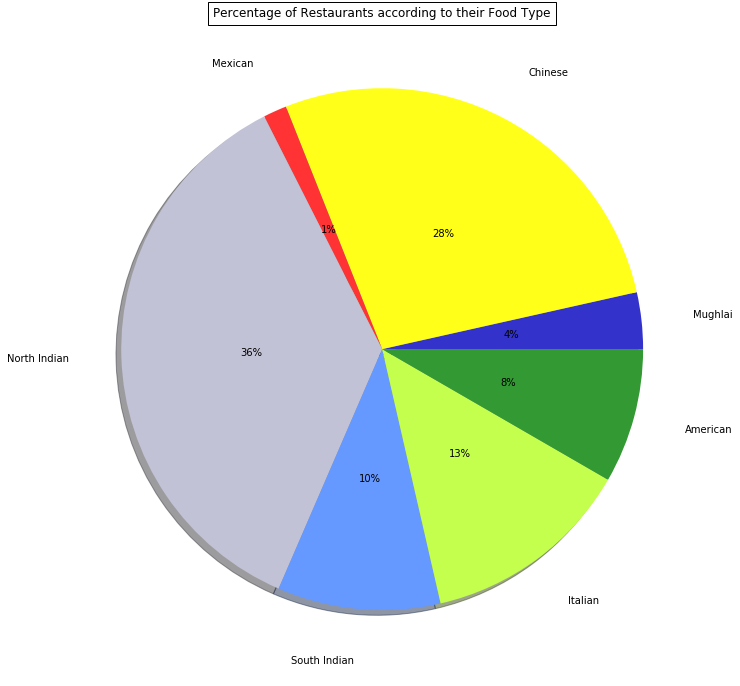

In [51]:
#pie chart showing % of various Food serving Type Restaurants
slices=[MughlaiFoodRestaurants.shape[0],
        ChineseFoodRestaurants.shape[0],
        MexicanFoodRestaurants.shape[0],
        NorthIndianFoodRestaurants.shape[0],
        SouthIndianFoodRestaurants.shape[0],
        ItalianFoodRestaurants.shape[0],
        AmericanFoodRestaurants.shape[0]]
labels=['Mughlai','Chinese','Mexican','North Indian','South Indian','Italian','American']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their Food Type", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(12,12)
plt.show()

# Analysis of Restaurants Whether Single Cuisine or Multi Cusine

In [52]:
SingleTypeofFoodServing = data[data['cuisines'].str.contains(',', case=False, regex=True,na=False)==False]
SingleTypeofFoodServing

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
10,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1,402,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari
15,Cafe Vivacity,Yes,No,3.8,90,Banashankari,Cafe,"Garlic Bread, Burgers, Sandwiches, Pizza, Hot ...",Cafe,650,"[('Rated 2.0', 'RATED\n Not so good place as ...",[],Cafes,Banashankari
33,Ovenstory Pizza,Yes,No,3.9,172,Banashankari,Delivery,"Paneer Tikka, Garlic Bread, Thin Crust Pizza, ...",Pizza,750,"[('Rated 4.0', 'RATED\n Stumbled upon this on...",[],Delivery,Banashankari
35,Behrouz Biryani,Yes,No,3.9,230,Banashankari,Delivery,"Raita, Gulab Jamun, Paneer Biryani, Vegetable ...",Biryani,650,"[('Rated 1.0', ""RATED\n Had ordered 'Zaikedaa...",[],Delivery,Banashankari
76,Sri Guru Kottureshwara Davangere Benne Dosa,Yes,No,4.1,558,Basavanagudi,Quick Bites,"Benne Dosa, Mirchi Bajji, Filter Coffee, Poha,...",South Indian,150,"[('Rated 4.0', 'RATED\n My go-to benne dosa p...","['Benne Dose', 'Benne Kali Dose', 'Open Dose',...",Delivery,Banashankari
94,Nandhini Deluxe,No,No,2.6,283,Banashankari,Casual Dining,"Biryani, Chicken Guntur, Thali, Buttermilk, Ma...",North Indian,600,"[('Rated 3.0', 'RATED\n Ididnt like much.\n\n...",[],Delivery,Banashankari
100,Kidambi's Kitchen,No,No,3.5,52,Banashankari,Quick Bites,Rooftop Ambience,South Indian,300,"[('Rated 4.0', 'RATED\n If you are looking fo...",[],Delivery,Banashankari
101,Mane Thindi,No,No,3.7,130,Banashankari,Quick Bites,"Coffee, Tea, Kesari Bath, Open Dosa, Vada, Idl...",South Indian,200,"[('Rated 3.0', ""RATED\n Ambience might not be...",[],Delivery,Banashankari
103,Floured-Baked With Love,No,No,3.8,45,Banashankari,"Takeaway, Delivery","Cup Cake, Chocolate Cake",Bakery,400,"[('Rated 5.0', 'RATED\n The cakes have the pe...",[],Delivery,Banashankari


In [53]:
MultipleTypeofFoodServing = data[data['cuisines'].str.contains(',', case=False, regex=True,na=False)]
MultipleTypeofFoodServing

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari
11,Cafe Shuffle,Yes,Yes,4.2,150,Banashankari,Cafe,"Mocktails, Peri Fries, Lasagne, Pizza, Chicken...","Cafe, Italian, Continental",600,"[('Rated 1.0', ""RATED\n \n\nHorrible. Not even...",[],Cafes,Banashankari
12,The Coffee Shack,Yes,Yes,4.2,164,Banashankari,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,"[('Rated 4.0', ""RATED\n Food - 4/5\nAmbience ...",[],Cafes,Banashankari


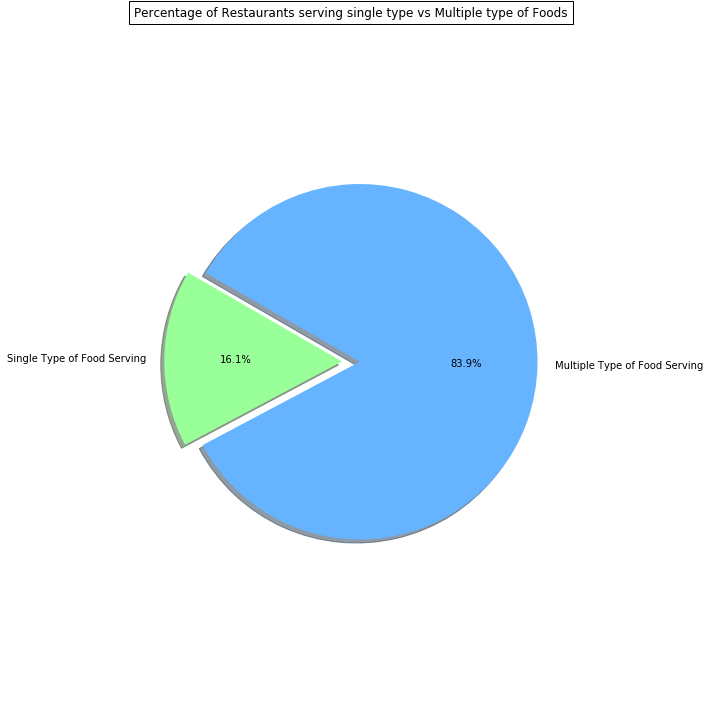

In [54]:
# Pie chart showing Percentage of Restaurants serving single type vs Multiple type of Foods
labels = ['Single Type of Food Serving', 'Multiple Type of Food Serving', ]
sizes = [SingleTypeofFoodServing.shape[0], MultipleTypeofFoodServing.shape[0]]

explode = (0, 0.1)

colors = ['#99ff99','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=150)

ax1.axis('equal')
plt.title("Percentage of Restaurants serving single type vs Multiple type of Foods", bbox={'facecolor':'2', 'pad':5})
fig1.set_size_inches(10,10)
plt.tight_layout()
plt.show()

#  MOST LIKED DISHES IN BANGALORE

#### Let's store the dishes liked in seperate list and then analyse it. 

In [56]:
import re
data=data[data['dish_liked'].notnull()]
data.index=range(data.shape[0])
likes=[]
for i in range(data.shape[0]):
    splited_array=re.split(',',data['dish_liked'][i])
    for item in splited_array:
        likes.append(item)




In [57]:
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(20)

 Pasta              2695
 Pizza              1916
 Cocktails          1882
 Burgers            1738
 Mocktails          1623
 Biryani            1309
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1171
 Fish               1118
 Paratha            1108
 Salads             1057
 Chicken Biryani    1004
Cocktails            891
 Fries               877
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
dtype: int64

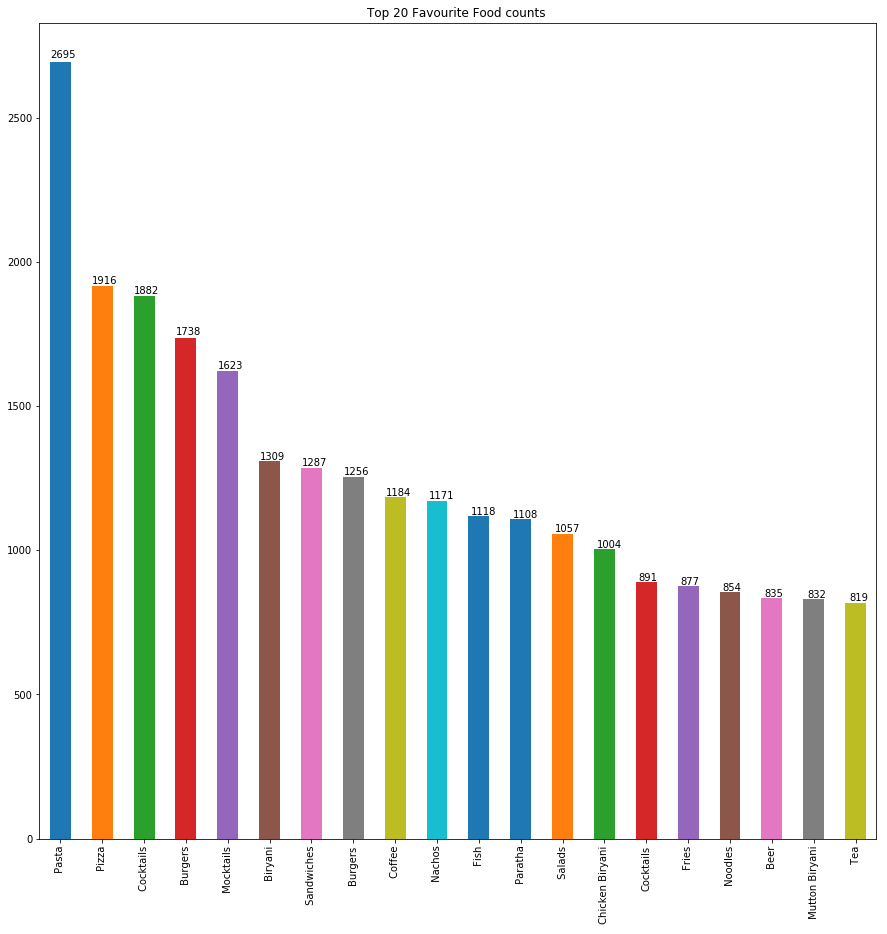

In [81]:
ax = favourite_food.nlargest(n=20, keep='first').plot('bar',figsize=(15,15),title = 'Top 20 Favourite Food counts ')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
